## Importing libraries

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
import plotly.offline as py
from plotly.offline import init_notebook_mode
py.init_notebook_mode(connected = True)
import plotly.graph_objects as go
import plotly.express as px
import plotly.io as pio

In [2]:
#import plotly.offline as pyo
#import plotly.graph_objs as go
# Set notebook mode to work in offline
#pyo.init_notebook_mode()
# Create traces
#trace0 = go.Scatter(
#    x=[1, 2, 3, 4],
#    y=[10, 15, 13, 17]
#)
#trace1 = go.Scatter(
#    x=[1, 2, 3, 4],
#    y=[16, 5, 11, 9]
#)
# Fill out data with our traces
#data = [trace0, trace1]
# Plot it and save as basic-line.html
#pyo.iplot(data, filename = 'basic-line')

In [3]:
#import plotly.express as px
#import plotly.offline as pyo
#import plotly.graph_objs as go

#from IPython import get_ipython
#import IPython.core.display
#import termcolor
#import pandas as pd
#import numpy as np
#import matplotlib.pyplot as plt
#import seaborn as sns
#import plotly.graph_objects as go
#from plotly.subplots import make_subplots
#from IPython.core.display import display, HTML

#%matplotlib inline
#display(HTML("<style>.container { width:90% !important; }</style>"))
#pyo.init_notebook_mode()

## Importing datasets

In [4]:
df1 = pd.read_csv('data/covid.csv')
df1.head()

,Country/Region,Continent,Population,TotalCases,NewCases,TotalDeaths,NewDeaths,TotalRecovered,NewRecovered,ActiveCases,"Serious,Critical",Tot Cases/1M pop,Deaths/1M pop,TotalTests,Tests/1M pop,WHO Region,iso_alpha
0,USA,North America,3.311981e+08,5032179,NaN,162804.0,NaN,2576668.0,NaN,2292707.0,18296.0,15194.0,492.0,63139605.0,190640.0,Americas,USA
1,Brazil,South America,2.127107e+08,2917562,NaN,98644.0,NaN,2047660.0,NaN,771258.0,8318.0,13716.0,464.0,13206188.0,62085.0,Americas,BRA
2,India,Asia,1.381345e+09,2025409,NaN,41638.0,NaN,1377384.0,NaN,606387.0,8944.0,1466.0,30.0,22149351.0,16035.0,South-EastAsia,IND
3,Russia,Europe,1.459409e+08,871894,NaN,14606.0,NaN,676357.0,NaN,180931.0,2300.0,5974.0,100.0,29716907.0,203623.0,Europe,RUS
4,South Africa,Africa,5.938157e+07,538184,NaN,9604.0,NaN,387316.0,NaN,141264.0,539.0,9063.0,162.0,3149807.0,53044.0,Africa,ZAF


In [5]:
df2 = pd.read_csv('data/covid_grouped.csv')
df2.head()

,Date,Country/Region,Confirmed,Deaths,Recovered,Active,New cases,New deaths,New recovered,WHO Region,iso_alpha
0,2020-01-22,Afghanistan,0,0,0,0,0,0,0,Eastern Mediterranean,AFG
1,2020-01-22,Albania,0,0,0,0,0,0,0,Europe,ALB
2,2020-01-22,Algeria,0,0,0,0,0,0,0,Africa,DZA
3,2020-01-22,Andorra,0,0,0,0,0,0,0,Europe,AND
4,2020-01-22,Angola,0,0,0,0,0,0,0,Africa,AGO


In [6]:
df1.columns

Index(['Country/Region', 'Continent', 'Population', 'TotalCases', 'NewCases',
       'TotalDeaths', 'NewDeaths', 'TotalRecovered', 'NewRecovered',
       'ActiveCases', 'Serious,Critical', 'Tot Cases/1M pop', 'Deaths/1M pop',
       'TotalTests', 'Tests/1M pop', 'WHO Region', 'iso_alpha'],
      dtype='object')

## Dropping columns that have null values

In [7]:
df1.drop(['NewCases', 'NewDeaths', 'NewRecovered'], axis = 1, inplace = True)

In [8]:
df1.head()

,Country/Region,Continent,Population,TotalCases,TotalDeaths,TotalRecovered,ActiveCases,"Serious,Critical",Tot Cases/1M pop,Deaths/1M pop,TotalTests,Tests/1M pop,WHO Region,iso_alpha
0,USA,North America,3.311981e+08,5032179,162804.0,2576668.0,2292707.0,18296.0,15194.0,492.0,63139605.0,190640.0,Americas,USA
1,Brazil,South America,2.127107e+08,2917562,98644.0,2047660.0,771258.0,8318.0,13716.0,464.0,13206188.0,62085.0,Americas,BRA
2,India,Asia,1.381345e+09,2025409,41638.0,1377384.0,606387.0,8944.0,1466.0,30.0,22149351.0,16035.0,South-EastAsia,IND
3,Russia,Europe,1.459409e+08,871894,14606.0,676357.0,180931.0,2300.0,5974.0,100.0,29716907.0,203623.0,Europe,RUS
4,South Africa,Africa,5.938157e+07,538184,9604.0,387316.0,141264.0,539.0,9063.0,162.0,3149807.0,53044.0,Africa,ZAF


## Visualizations with Custom Bar Charts

In [9]:
df1.columns

Index(['Country/Region', 'Continent', 'Population', 'TotalCases',
       'TotalDeaths', 'TotalRecovered', 'ActiveCases', 'Serious,Critical',
       'Tot Cases/1M pop', 'Deaths/1M pop', 'TotalTests', 'Tests/1M pop',
       'WHO Region', 'iso_alpha'],
      dtype='object')

#### Total Cases vs Countries

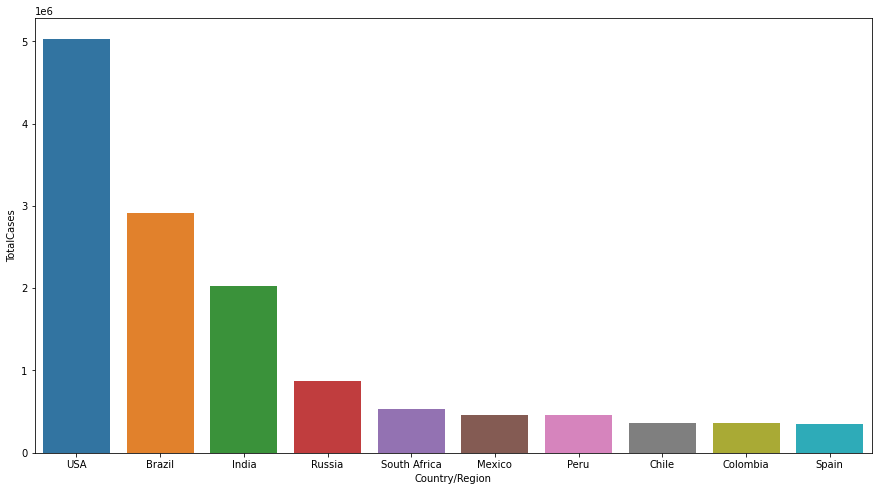

In [10]:
plt.figure(figsize=(15,8))
sns.barplot(x='Country/Region', y='TotalCases', data=df1.head(10))

#### Total Deaths vs Countries

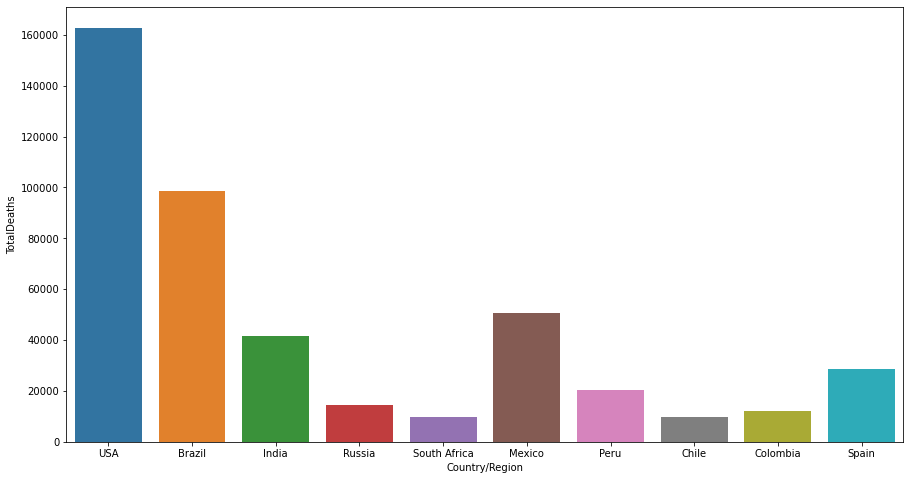

In [11]:
plt.figure(figsize=(15,8))
sns.barplot(x='Country/Region', y='TotalDeaths', data=df1.head(10))

#### Total Recovered vs Countries

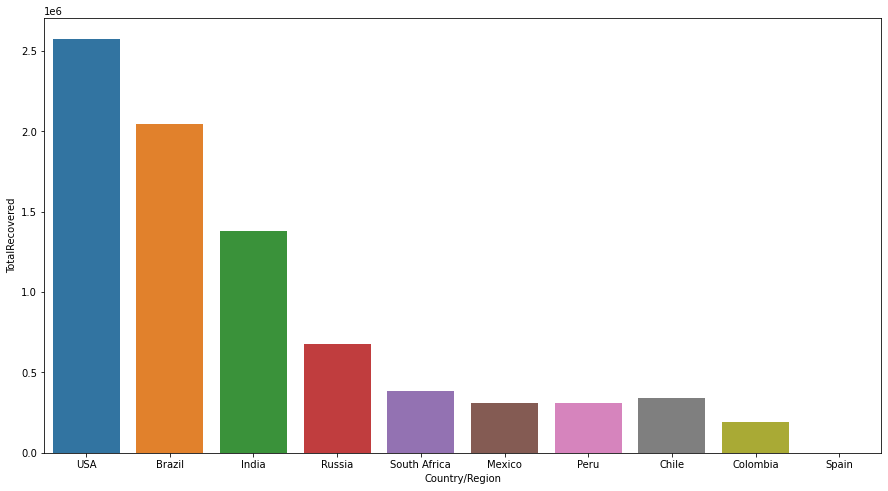

In [12]:
plt.figure(figsize=(15,8))
sns.barplot(x='Country/Region', y='TotalRecovered', data=df1.head(10))

#### Total Tests vs Countries

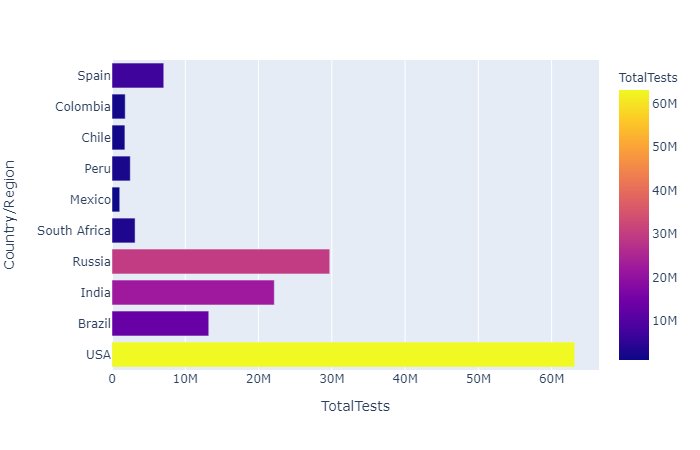

In [13]:
fig4 = px.bar(df1.head(10), x='TotalTests', y='Country/Region', color='TotalTests', orientation="h", height = 500, hover_data=['Country/Region', 'Continent'])
fig4.show("png")

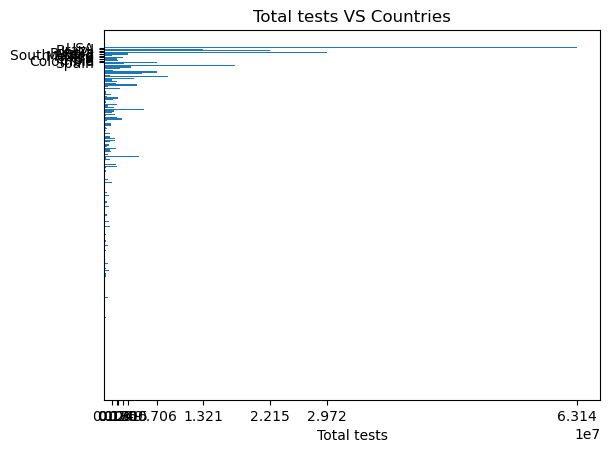

In [14]:
plt.rcdefaults()
fig, ax = plt.subplots()

ax.barh(df1['Country/Region'], df1['TotalTests'], align='center')
ax.set_yticks(df1['Country/Region'].head(10))
ax.set_xticks(df1['TotalTests'].head(10))
ax.set_yticklabels(df1['Country/Region'])
ax.invert_yaxis()  # labels read top-to-bottom
ax.set_xlabel('Total tests')
ax.set_title('Total tests VS Countries')

plt.show()

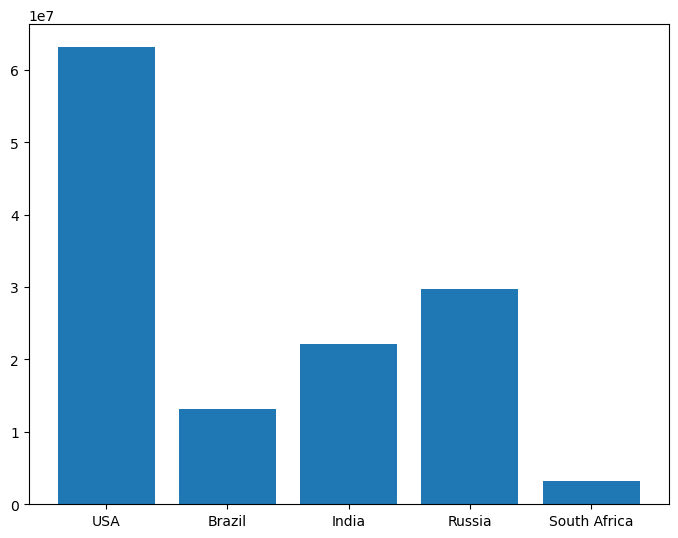

In [15]:
fig = plt.figure()
ax = fig.add_axes([0,0,1,1])
ax.bar(df1['Country/Region'].head(5),df1['TotalTests'].head(5), orientation='vertical')
plt.show()

#### Total Tests vs Countries

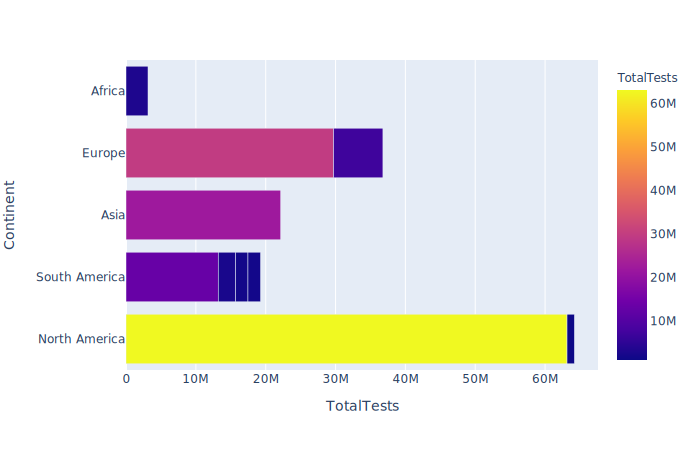

In [16]:
fig5 = px.bar(df1.head(10), x='TotalTests', y='Continent', color='TotalTests', orientation="h", height = 500, hover_data=['Country/Region', 'Continent'])
fig5.show("svg")

## Data Visualization using Bubble Chart

In [17]:
df1.columns

Index(['Country/Region', 'Continent', 'Population', 'TotalCases',
       'TotalDeaths', 'TotalRecovered', 'ActiveCases', 'Serious,Critical',
       'Tot Cases/1M pop', 'Deaths/1M pop', 'TotalTests', 'Tests/1M pop',
       'WHO Region', 'iso_alpha'],
      dtype='object')

#### Total Cases vs Continent (50 countries)

In [19]:
px.scatter(df1.head(50), x = 'Continent', y='TotalCases', hover_data = ['Country/Region', 'Continent'],
          color='TotalCases', size='TotalCases', size_max=80)


In [20]:
px.scatter(df1.head(50), x = 'Continent', y='TotalCases', hover_data = ['Country/Region', 'Continent'],
          color='TotalCases', size='TotalCases', size_max=80, log_y=True)

#### Total Tests vs Continent (50 countries)

In [23]:
px.scatter(df1.head(50), x = 'Continent', y='TotalTests', hover_data = ['Country/Region', 'Continent'],
          color='TotalTests', size='TotalTests', size_max=80)

In [22]:
px.scatter(df1.head(50), x = 'Continent', y='TotalTests', hover_data = ['Country/Region', 'Continent'],
          color='TotalTests', size='TotalTests', size_max=80, log_y=True)

#### Total Deaths vs Continent (20 countries)

In [24]:
px.scatter(df1.head(20), x = 'Continent', y='TotalDeaths', hover_data = ['Country/Region', 'Continent'],
          color='TotalDeaths', size='TotalDeaths', size_max=80, log_y=True)

#### Total Cases vs Countries (All Countries)

In [26]:
px.scatter(df1.head(100), x = 'Country/Region', y='TotalCases', hover_data = ['Country/Region', 'Continent'],
          color='TotalCases', size='TotalCases', size_max=80)

In [28]:
px.scatter(df1.head(30), x = 'Country/Region', y='TotalCases', hover_data = ['Country/Region', 'Continent'],
          color='Country/Region', size='TotalCases', size_max=80, log_y=True)